In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

import tensorflow_datasets as tfds

from tensorflow.keras.layers import Dense

import os

os.environ["CUDA_VISIBLE_DEVICES"]='3'


In [2]:
raw_dataset = pd.read_csv('./dataset/weight-height.csv')
raw_dataset

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
raw_dataset['Height'] = raw_dataset['Height'].apply(lambda x: x * 2.54)
raw_dataset['Weight'] = raw_dataset['Weight'].apply(lambda x: x * 0.4563)

In [4]:
raw_dataset

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414
...,...,...,...
9995,Female,168.078536,62.411552
9996,Female,170.350573,77.967025
9997,Female,162.224700,58.623288
9998,Female,175.346978,74.765878


<AxesSubplot:xlabel='Height', ylabel='Weight'>

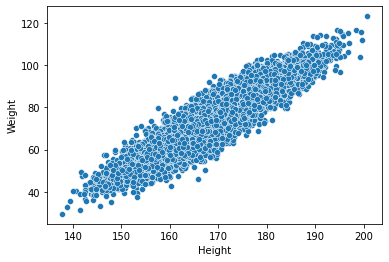

In [5]:
sns.scatterplot(data = raw_dataset, x = raw_dataset['Height'], y = raw_dataset['Weight'])

<AxesSubplot:xlabel='Height', ylabel='Weight'>

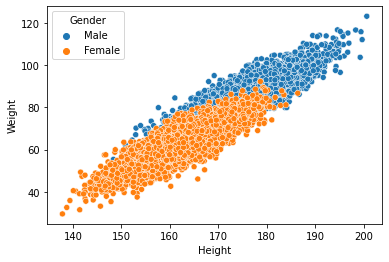

In [6]:
sns.scatterplot(data = raw_dataset, x = raw_dataset['Height'], y = raw_dataset['Weight'], hue = raw_dataset['Gender'])

In [7]:
x_train = raw_dataset['Height']
y_train = raw_dataset['Weight']

In [8]:
x_train.shape

(10000,)

In [58]:
def build_model():
    model = tf.keras.Sequential([
        Dense(1, input_shape = [1]),
    ])
    
    model.compile(loss='MSE')
    model.fit(x=x_train, y=y_train, epochs=40, verbose=1)
    
    return model

In [59]:
model = build_model()

Epoch 1/40
313/313 [==============================] - 1s 2ms/step - loss: 7937.0903
Epoch 2/40
313/313 [==============================] - 1s 2ms/step - loss: 1591.8992
Epoch 3/40
313/313 [==============================] - 1s 2ms/step - loss: 128.2356
Epoch 4/40
313/313 [==============================] - 1s 2ms/step - loss: 117.6803
Epoch 5/40
313/313 [==============================] - 1s 2ms/step - loss: 117.5333
Epoch 6/40
313/313 [==============================] - 1s 2ms/step - loss: 117.5364
Epoch 7/40
313/313 [==============================] - 1s 2ms/step - loss: 117.3960
Epoch 8/40
313/313 [==============================] - 1s 2ms/step - loss: 117.2909
Epoch 9/40
313/313 [==============================] - 1s 2ms/step - loss: 117.2504
Epoch 10/40
313/313 [==============================] - 1s 2ms/step - loss: 117.0954
Epoch 11/40
313/313 [==============================] - 1s 2ms/step - loss: 117.0710
Epoch 12/40
313/313 [==============================] - 1s 2ms/step - loss: 116.9672

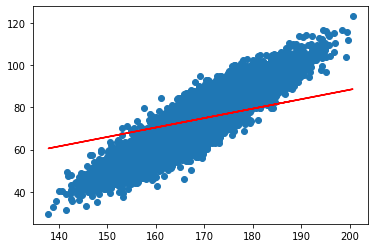

In [38]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, model.predict(x_train), color='red')
#sns.scatterplot(data = raw_dataset, x = raw_dataset['Height'], y = raw_dataset['Weight'])
#model.predict(x_train)

In [49]:
def build_model():
    model = tf.keras.Sequential([
        Dense(1, input_shape =(1,)),
    ])
    
    # model.compile(optimizer='adam', loss='MSE', metrics=['mae', 'mse'])

    opt = tf.keras.optimizers.Adam(learning_rate=0.8)
    model.compile(optimizer=opt, loss='mean_squared_error')

    model.fit(x=x_train, y=y_train, epochs=40, verbose=1)
    
    return model

In [50]:
model = build_model()

Epoch 1/40
313/313 [==============================] - 1s 2ms/step - loss: 556.9805
Epoch 2/40
313/313 [==============================] - 1s 2ms/step - loss: 131.0091
Epoch 3/40
313/313 [==============================] - 1s 2ms/step - loss: 131.7121
Epoch 4/40
313/313 [==============================] - 1s 2ms/step - loss: 115.6197
Epoch 5/40
313/313 [==============================] - 1s 2ms/step - loss: 105.6302
Epoch 6/40
313/313 [==============================] - 1s 2ms/step - loss: 94.1320
Epoch 7/40
313/313 [==============================] - 1s 2ms/step - loss: 92.8121
Epoch 8/40
313/313 [==============================] - 1s 2ms/step - loss: 83.7856
Epoch 9/40
313/313 [==============================] - 1s 2ms/step - loss: 79.4979
Epoch 10/40
313/313 [==============================] - 1s 2ms/step - loss: 86.3991
Epoch 11/40
313/313 [==============================] - 1s 2ms/step - loss: 82.9240
Epoch 12/40
313/313 [==============================] - 1s 2ms/step - loss: 84.8813
Epoch 13

<function matplotlib.pyplot.show(close=None, block=None)>

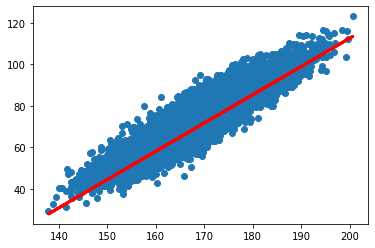

In [51]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, model.predict(x_train), color='red', linewidth=3)
plt.show

In [56]:
w, b = model.get_weights()

In [57]:
print(w, b)

[[1.361807]] [-159.76872]
